# Analise de dados de chuva e casos de dengue

## Objetivo:
Identificar correlação entre as chuvas e casos de dengue

In [ ]:
import pandas as pd

## Tratamentos dos dados 
Os dados foram tratados com apache-beam. resultado no arquivo:
resultado-00000-of-00001.csv

### Carregando arquivo

In [2]:
arquivo = 'resultado-00000-of-00001.csv'
df = pd.read_csv(arquivo, delimiter=';')

## Análise exploratória

In [3]:
df.head()

,UF,ANO,MES,CHUVA,DENGUE
0,SP,2015,1,4465.0,772.0
1,SP,2015,2,6595.0,3086.0
2,SP,2015,3,6210.6,8824.0
3,SP,2015,4,1862.0,9932.0
4,SP,2015,5,2756.6,8919.0


In [8]:
df.groupby(['UF', 'ANO'])[['CHUVA', 'DENGUE']].mean().reset_index()

,UF,ANO,CHUVA,DENGUE
0,CE,2015,771.783333,5014.250000
1,CE,2016,533.700000,5433.083333
2,CE,2017,775.350000,5519.666667
3,CE,2018,797.950000,1070.083333
4,CE,2019,809.000000,2559.250000
5,ES,2015,575.650000,3734.000000
6,ES,2016,733.916667,4560.750000
7,ES,2017,903.883333,1028.666667
8,ES,2018,1399.166667,1407.500000
9,ES,2019,1122.350000,6716.083333


### Quantidade de cados de dengue por estado

In [4]:
df.groupby(['UF']).sum()['DENGUE'].sort_values(ascending=False)

UF
PR    467511.0
CE    235156.0
RJ    214580.0
ES    209364.0
SP    156627.0
MG    131970.0
RS      2373.0
Name: DENGUE, dtype: float64

<Axes: xlabel='UF'>

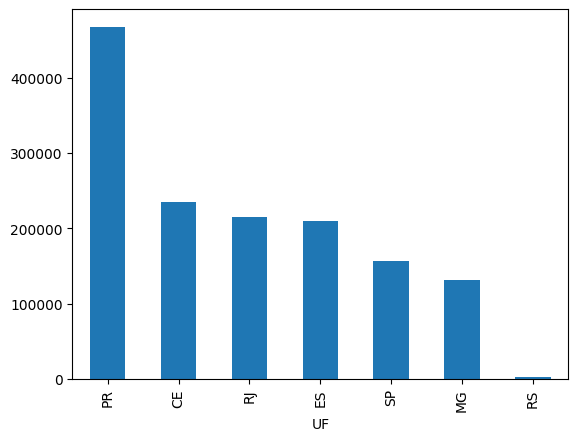

In [7]:
casos_por_estado = df.groupby(['UF']).sum()['DENGUE'].sort_values(ascending=False)
casos_por_estado.plot(kind='bar')

### Quantidade de chuva por estado

In [8]:
df.groupby(['UF']).sum()['CHUVA'].sort_values(ascending=False)

UF
RS    336328.0
MG    331645.0
SP    236657.0
PR    175715.6
RJ    142129.4
ES     56819.6
CE     44253.4
Name: CHUVA, dtype: float64

<Axes: xlabel='UF'>

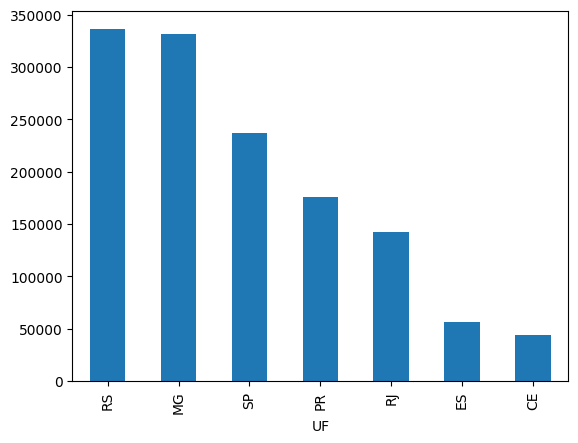

In [9]:
chuva_por_estado = df.groupby(['UF']).sum()['CHUVA'].sort_values(ascending=False)
chuva_por_estado.plot(kind='bar')

<Axes: xlabel='UF'>

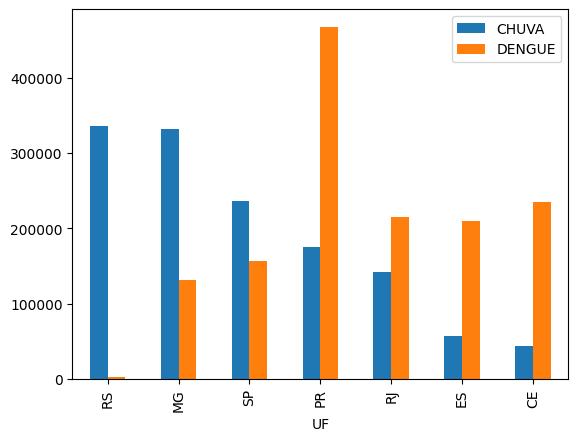

In [55]:
chuva_e_casos = df.groupby(['UF']).sum()[['CHUVA', 'DENGUE']].sort_values('CHUVA', ascending=False)
chuva_e_casos.plot(kind='bar')

### Gráfico por Mes

<Axes: title={'center': 'Chuva e dengue por mês'}, xlabel='Meses', ylabel='Casos de dengue'>

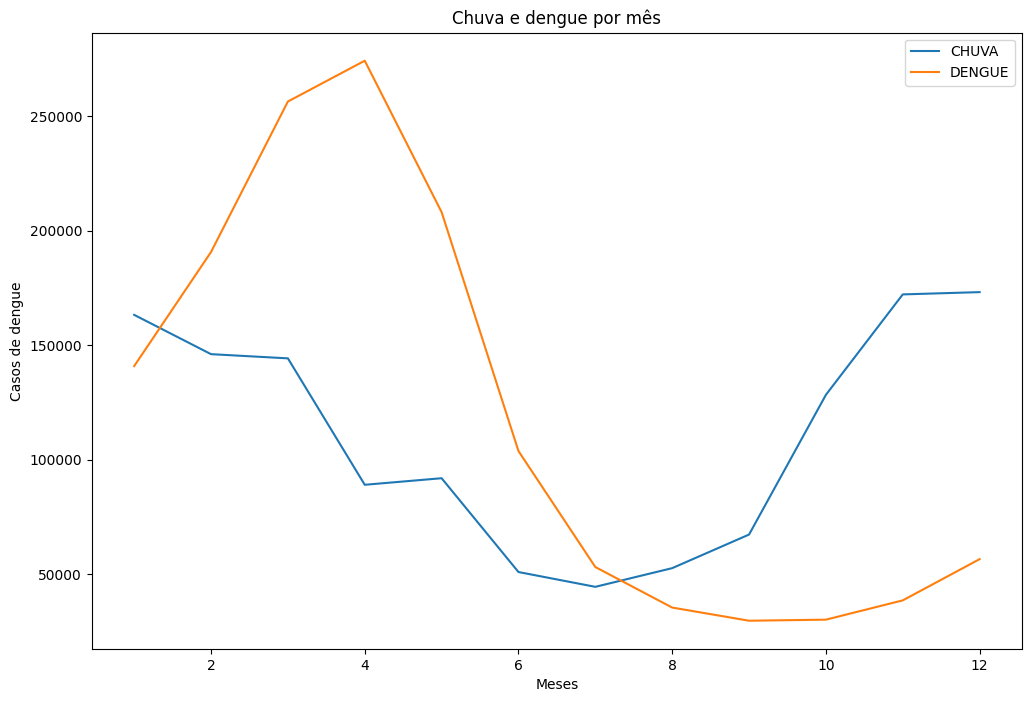

In [33]:
df[['MES', 'CHUVA', 'DENGUE']].groupby(['MES']).sum().plot(title='Chuva e dengue por mês', figsize=(12,8), ylabel='Casos de dengue' ,xlabel='Meses')

In [18]:
correlacao = df['CHUVA'].corr(df['DENGUE'])
print(f'A correlação entre Chuva e Dengue é {correlacao.round(2)}')

A correlação entre Chuva e Dengue é -0.07


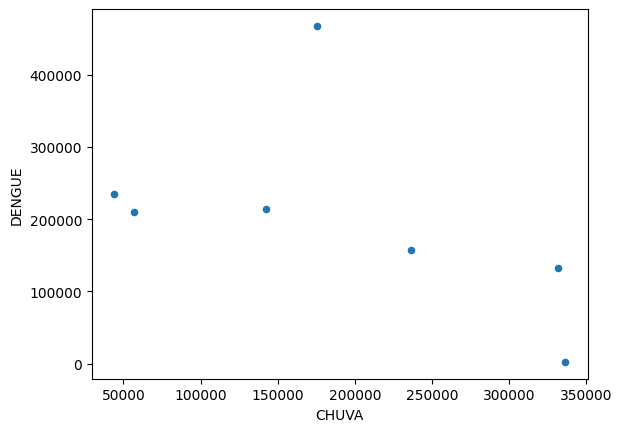

In [68]:
chuva_e_casos.plot.scatter('CHUVA', 'DENGUE');

### conclusão

Após a análise dos dados não foi encontrada evidências que sugiram uma relação direta entre a quantidade de chuva e o número de casos de dengue.
A identifiação de outros fatores e e variáveis deve ser considerada em futuras investigações.  
